In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
df.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

<Figure size 2160x720 with 0 Axes>

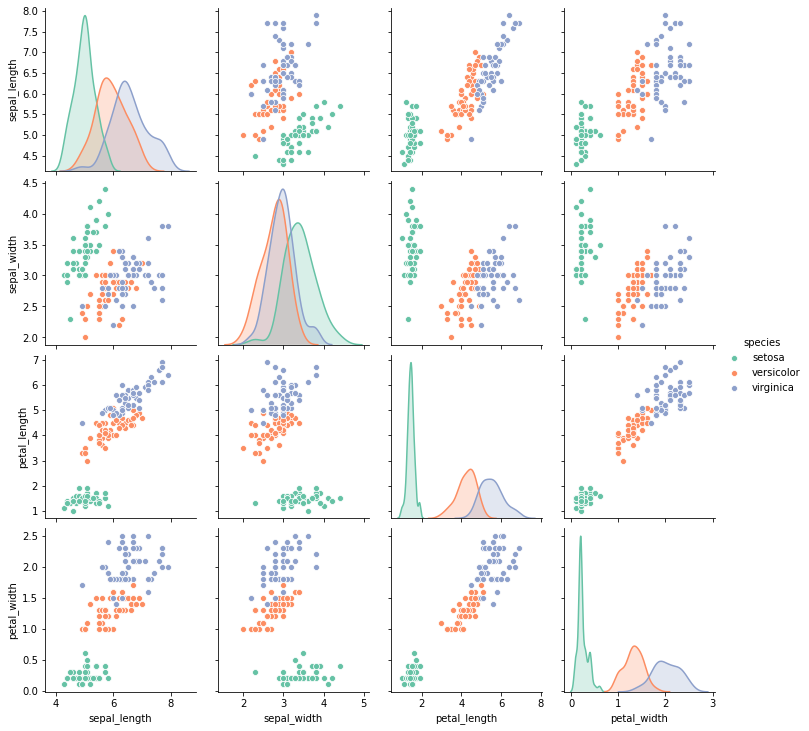

In [5]:
# Creating a pairplot to visualize the similarities and especially difference between the species
plt.figure(figsize=(30,10))
sns.pairplot(data=df, hue='species', palette='Set2')

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['species']=le.fit_transform(df['species'])
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [7]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[features].values
X[0:5,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
Y = df['species'].values

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

print('Train set:', X_train.shape,  Y_train.shape)
print('Test set:', X_test.shape,  Y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


# Gaussian Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

In [71]:
gnb.fit(X_train,Y_train)

GaussianNB()

In [115]:
New_prediction = gnb.predict(X_test)
New_prediction

array([2, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2])

In [116]:
Train_Score = gnb.score(X_train,Y_train)*100
print("Trainning Score is {}".format(Train_Score))

Trainning Score is 95.83333333333334


In [117]:
Test_Score_G = gnb.score(X_test,Y_test)*100
print("Testing Score is {}".format(Test_Score_G))

Testing Score is 96.66666666666667


In [75]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(Y_test,New_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.83      1.00      0.91         5
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.94      0.96      0.95        30
weighted avg       0.97      0.97      0.97        30



In [76]:
# Confusion Matrix:
cm = confusion_matrix(Y_test,New_prediction)

In [77]:
cm

array([[16,  0,  0],
       [ 0,  5,  0],
       [ 0,  1,  8]], dtype=int64)

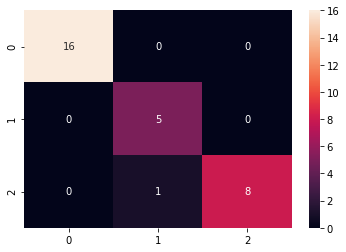

In [78]:
sns.heatmap(cm,annot=True)

# Bernoulli Naive Bayes

In [118]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()

In [119]:
clf.fit(X_train,Y_train)

BernoulliNB()

In [120]:
Y_pred = clf.predict(X_test)

In [121]:
pd.DataFrame({'Actual_data':Y_test,
             "New_Predication":Y_pred})

,Actual_data,New_Predication
0,2,1
1,0,1
2,2,1
3,2,1
4,2,1
5,1,1
6,1,1
7,0,1
8,0,1
9,2,1


In [122]:
Clf_Train = clf.score(X_train,Y_train)
Clf_Train

0.375

In [84]:
Clf_Test = clf.score(X_test,Y_test)
Clf_Test

0.16666666666666666

# Multinomial Naive Bayes

In [85]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

In [86]:
mnb.fit(X_train,Y_train)

MultinomialNB()

In [87]:
mnb.coef_

array([[-0.71349081, -1.08121559, -1.93703139, -3.62103799],
       [-0.87995895, -1.63019882, -1.21687822, -2.37347776],
       [-0.96125916, -1.74111574, -1.13278647, -2.11918187]])

In [88]:
Y_pred = mnb.predict(X_test)

In [89]:
pd.DataFrame({"Actual":Y_test,
              "predicated":Y_pred})

,Actual,predicated
0,2,2
1,0,0
2,2,1
3,2,2
4,2,1
5,1,1
6,1,1
7,0,0
8,0,0
9,2,1


In [90]:
mnb_Train = mnb.score(X_train,Y_train)
mnb_Train

0.875

In [91]:
mnb_Test = mnb.score(X_test,Y_test)
mnb_Test

0.8666666666666667

In [92]:
cm = confusion_matrix(Y_test,Y_pred)

In [93]:
cm

array([[16,  0,  0],
       [ 0,  5,  0],
       [ 0,  4,  5]], dtype=int64)

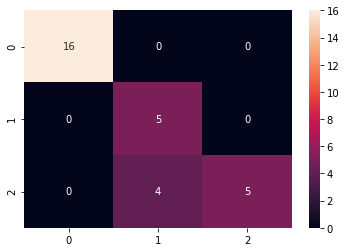

In [94]:
sns.heatmap(cm,annot=True)

# Complement Naive Bayes

In [95]:
from sklearn.naive_bayes import ComplementNB

CNB = ComplementNB()

In [96]:
CNB.fit(X_train,Y_train)

ComplementNB()

In [98]:
New_predi = CNB.predict(X_test)

In [99]:
pd.DataFrame({'Actual_Data':Y_test,
              "New_Data":New_predi})

,Actual_Data,New_Data
0,2,2
1,0,0
2,2,2
3,2,2
4,2,2
5,1,2
6,1,2
7,0,0
8,0,0
9,2,2


In [100]:
CNB_Train_score =CNB.score(X_train,Y_train)
CNB_Train_score

0.625

In [101]:
CNB_Test_score= CNB.score(X_test,Y_test)
CNB_Test_score

0.8333333333333334

In [102]:
cm = confusion_matrix(Y_test,New_predi)
cm

array([[16,  0,  0],
       [ 0,  0,  5],
       [ 0,  0,  9]], dtype=int64)

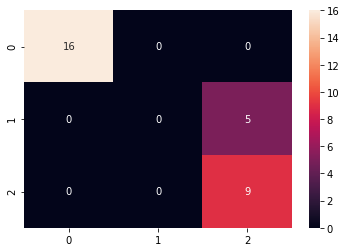

In [103]:
sns.heatmap(cm,annot=True)

# Categorical Naive Bayes

In [104]:
from sklearn.naive_bayes import CategoricalNB

CatNB = CategoricalNB()

In [105]:
CatNB.fit(X_train,Y_train)

CategoricalNB()

In [106]:
CatNB_train_score = CatNB.score(X_train,Y_train)
CatNB_train_score

0.9416666666666667

In [111]:
CatNB_Test_Score = CatNB.score(X_test,Y_test)
CatNB_Test_Score

0.9

In [112]:
New_pred = CatNB.predict(X_test)
pd.DataFrame({'Actual_Data':Y_test,
             "New_predict":New_pred})

,Actual_Data,New_predict
0,2,2
1,0,0
2,2,2
3,2,2
4,2,2
5,1,1
6,1,2
7,0,0
8,0,0
9,2,2


In [113]:
cm = confusion_matrix(Y_test,New_pred)
cm

array([[16,  0,  0],
       [ 0,  4,  1],
       [ 0,  2,  7]], dtype=int64)

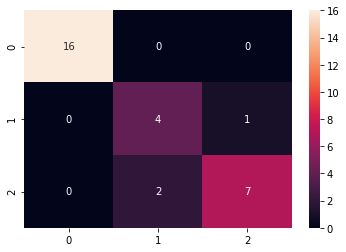

In [114]:
sns.heatmap(cm,annot=True)

# Overall Comparison

In [139]:
print("-----------------------------------")
print("Gaussian: {}".format(Test_Score_G)) 
print("Bernoulli: {}".format(Clf_Test*100)) 
print("Multinomial: {}".format(mnb_Test*100)) 
print("Complement: {}".format(CNB_Test_score*100)) 
print("Categorical: {}".format(CatNB_Test_Score*100)) 
print("-----------------------------------")

-----------------------------------
Gaussian: 96.66666666666667
Bernoulli: 16.666666666666664
Multinomial: 86.66666666666667
Complement: 83.33333333333334
Categorical: 90.0
-----------------------------------
